# Scikit-learn. Обучение без учителя
### Задание 1
Импортируйте библиотеки `pandas`, `numpy` и `matplotlib`.<br>
Загрузите `Boston House Prices dataset` из встроенных наборов данных библиотеки `sklearn`.<br>
Создайте датафреймы `X` и `y` из этих данных.<br>
Разбейте эти датафреймы на тренировочные `(X_train, y_train)` и тестовые `(X_test, y_test)` с помощью функции `train_test_split` так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент `random_state` должен быть равен 42.<br>
Масштабируйте данные с помощью `StandardScaler`.<br>
Постройте модель `TSNE` на тренировочный данных с параметрами:<br>
 - `n_components=2`, 
 - `learning_rate=250`, 
 - `random_state=42`.

Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
boston = load_boston()
data = boston['data']
feature_names = boston['feature_names']
target = boston['target']

In [3]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()

In [6]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

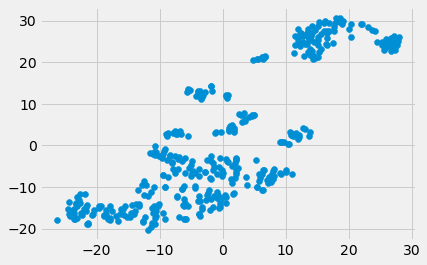

In [8]:
plt.style.use('fivethirtyeight')
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]);

### Задание 2
С помощью `KMeans` разбейте данные из тренировочного набора на 3 кластера, используя все признаки из датафрейма `X_train`.<br>
Параметр `max_iter` должен быть равен 100, `random_state` сделайте равным 42.<br>
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью `TSNE`, и раскрасьте точки из разных кластеров разными цветами.<br>
Вычислите средние значения `price` и `CRIM` в разных кластерах.

In [9]:
from sklearn.cluster import KMeans
CLUSTERS = 3
kmeans = KMeans(n_clusters=CLUSTERS, max_iter=100, random_state=42)

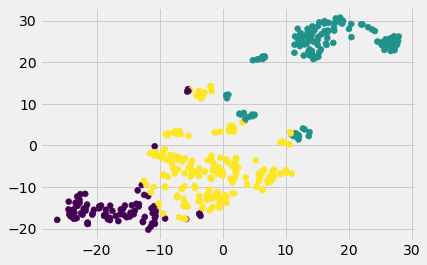

In [10]:
labels_train = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train);

In [11]:
cluster_means = pd.DataFrame(columns=['price_mean', 'CRIM_mean'])
for i in range(CLUSTERS):
    cluster_means.loc[i] = [y_train[labels_train == i].mean()[0], 
                            X_train['CRIM'][labels_train == i].mean()]

In [12]:
cluster_means

,price_mean,CRIM_mean
0,27.788372,0.073566
1,16.165354,10.797028
2,24.958115,0.421660


### * Задание 3
Примените модель `KMeans`, построенную в предыдущем задании, к данным из тестового набора.<br>
Вычислите средние значения `price` и `CRIM` в разных кластерах на тестовых данных.

In [13]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [14]:
cluster_test_means = pd.DataFrame(columns=['price_mean', 'CRIM_mean'])
for i in range(CLUSTERS):
    cluster_test_means.loc[i] = [y_test[labels_test == i].mean()[0], 
                                 X_test['CRIM'][labels_test == i].mean()]

In [15]:
cluster_test_means

,price_mean,CRIM_mean
0,33.871429,0.086186
1,16.437143,10.165531
2,21.552830,0.252007
